In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import silhouette_score


In [2]:
df= pd.read_excel("C:/Users/ACER/data mining/HotelCustomersDataset.xlsx")

In [3]:
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df.shape

(83590, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [6]:
df.dtypes

ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: o

In [7]:
df.isnull().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [8]:
#menghapus miss value
df = df.dropna()

In [9]:
df.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
#Menghapus kolom yang tidak ingin dipakai
df = df.drop(columns=['ID', 'NameHash', 'DocIDHash', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'])
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other
83586,IRL,47.0,0,109,327.1,277.5,0,0,1,6,3,3,3,Travel Agent/Operator,Other
83587,IRL,53.0,0,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other
83588,IRL,85.0,0,109,981.3,9.0,0,0,1,6,3,3,3,Travel Agent/Operator,Other


In [12]:
df.shape

(79811, 15)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,79811.0,45.398028,16.572368,-11.0,34.0,46.0,57.0,122.00
DaysSinceCreation,79811.0,446.483267,310.620996,0.0,174.0,385.0,703.0,1095.00
AverageLeadTime,79811.0,66.809663,87.990086,-1.0,0.0,30.0,104.0,588.00
LodgingRevenue,79811.0,302.159477,368.022975,0.0,64.0,236.0,407.0,9682.40
OtherRevenue,79811.0,67.956300,112.640373,0.0,2.0,39.8,88.5,7730.25
BookingsCanceled,79811.0,0.001842,0.065912,0.0,0.0,0.0,0.0,9.00
BookingsNoShowed,79811.0,0.000576,0.028312,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,79811.0,0.792948,0.690435,0.0,1.0,1.0,1.0,66.00
PersonsNights,79811.0,4.698337,4.587289,0.0,1.0,4.0,8.0,116.00
RoomNights,79811.0,2.376276,2.196953,0.0,1.0,2.0,4.0,116.00


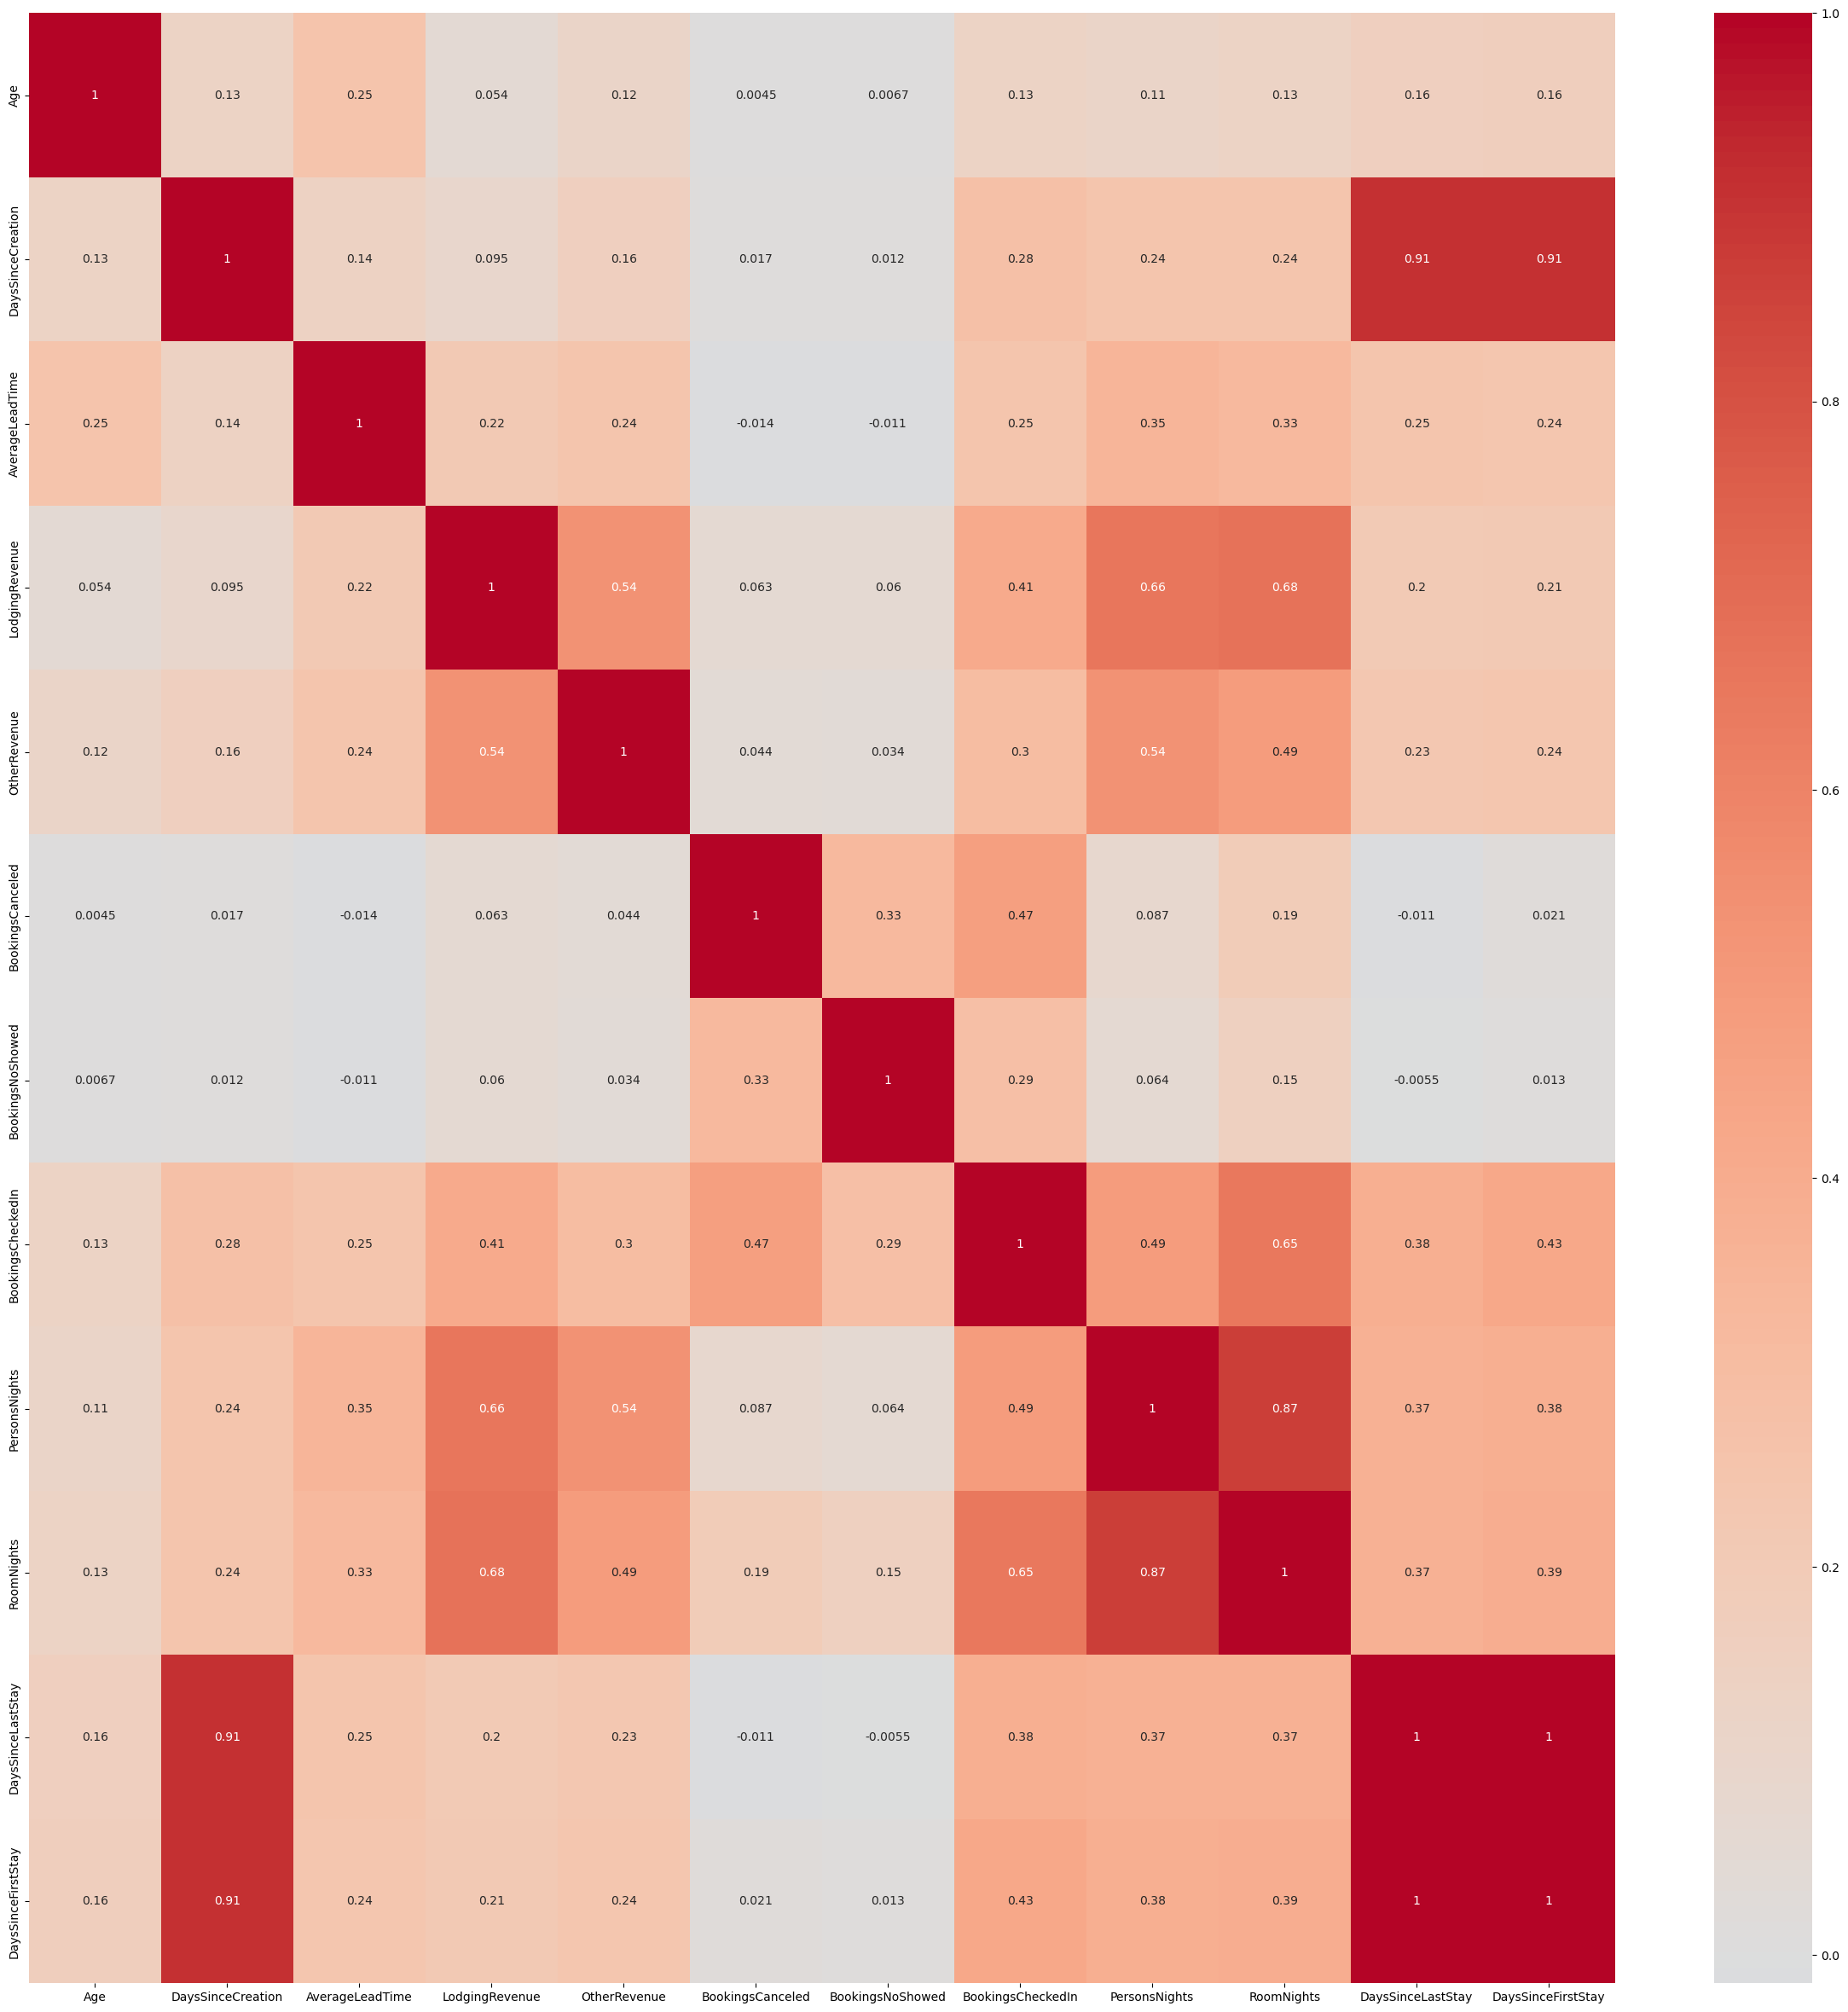

In [14]:
numeric_data = df.select_dtypes(include=['number'])
corrmat = numeric_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)
plt.show()

In [15]:
numeric_df = df.select_dtypes(include=['number'])
# Korelasi antar variabel numerik
numeric_df.corr()


,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay
Age,1.000000,0.129327,0.252229,0.053606,0.117694,0.004525,0.006748,0.133286,0.112852,0.132383,0.162978,0.163980
DaysSinceCreation,0.129327,1.000000,0.137880,0.095017,0.157979,0.016982,0.012308,0.275261,0.244961,0.243940,0.907308,0.911349
AverageLeadTime,0.252229,0.137880,1.000000,0.219287,0.243129,-0.014479,-0.011388,0.246543,0.351832,0.329748,0.245581,0.241844
LodgingRevenue,0.053606,0.095017,0.219287,1.000000,0.537974,0.063334,0.060205,0.408424,0.656203,0.675884,0.204580,0.214364
OtherRevenue,0.117694,0.157979,0.243129,0.537974,1.000000,0.044341,0.033746,0.304701,0.538393,0.490975,0.230621,0.237076
BookingsCanceled,0.004525,0.016982,-0.014479,0.063334,0.044341,1.000000,0.328435,0.469282,0.086955,0.194487,-0.011095,0.021245
BookingsNoShowed,0.006748,0.012308,-0.011388,0.060205,0.033746,0.328435,1.000000,0.288780,0.064337,0.149811,-0.005512,0.013280
BookingsCheckedIn,0.133286,0.275261,0.246543,0.408424,0.304701,0.469282,0.288780,1.000000,0.489291,0.654642,0.383837,0.427928
PersonsNights,0.112852,0.244961,0.351832,0.656203,0.538393,0.086955,0.064337,0.489291,1.000000,0.871843,0.373218,0.382465
RoomNights,0.132383,0.243940,0.329748,0.675884,0.490975,0.194487,0.149811,0.654642,0.871843,1.000000,0.369923,0.390723


In [16]:
# Tampilkan daftar usia
usia = sorted(df['Age'].unique())
print(usia)

[-11.0, -10.0, -9.0, -7.0, -6.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 96.0, 109.0, 110.0, 113.0, 114.0, 122.0]


In [17]:
# Hapus baris dengan nilai 'age' kurang dari 0
df = df[df['Age'] >= 0]

# Cek jumlah baris pada kolom 'age'
jumlah_baris = df['Age'].count()

# Tampilkan jumlah baris
print(f"Jumlah baris pada kolom 'Age' setelah penghapusan: {jumlah_baris}")

Jumlah baris pada kolom 'Age' setelah penghapusan: 79794


In [18]:
#menghitung jumlah outliers
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
outliers

Age                      12
DaysSinceCreation         0
AverageLeadTime        3173
LodgingRevenue         3722
OtherRevenue           4782
BookingsCanceled         98
BookingsNoShowed         38
BookingsCheckedIn     20418
PersonsNights           966
RoomNights              632
DaysSinceLastStay         0
DaysSinceFirstStay        0
dtype: int64

In [19]:
#MENGATASI OUTLIER DENGAN MENGGUNAKAN WINSORIZE

numeric_df = df.select_dtypes(include=['number']).drop(columns=['Age','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn'])
# Winsorize setiap kolom numerik di numeric_df
df_winsorized = numeric_df.apply(lambda x: winsorize(x, limits=[0.25, 0.25]))  # Winsorize 25% terendah dan 25% tertinggi
# Cek kembali jumlah outlier setelah winsorizing
Q1_win = df_winsorized.quantile(0.25)
Q3_win = df_winsorized.quantile(0.75)
IQR_win = Q3_win - Q1_win
df_outlier = ((df_winsorized < (Q1_win - 1.5 * IQR_win)) | (df_winsorized > (Q3_win + 1.5 * IQR_win))).sum()

df_outlier

DaysSinceCreation     0
AverageLeadTime       0
LodgingRevenue        0
OtherRevenue          0
PersonsNights         0
RoomNights            0
DaysSinceLastStay     0
DaysSinceFirstStay    0
dtype: int64

In [20]:
df_winsorized

,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay
0,174,45,371.0,88.5,8,4,151,682
2,703,0,64.0,2.0,1,1,25,26
3,703,93,240.0,60.0,8,4,678,682
4,703,0,64.0,2.0,1,1,25,26
5,703,58,230.0,24.0,4,2,678,682
...,...,...,...,...,...,...,...,...
83585,174,0,64.0,2.0,1,1,25,26
83586,174,104,327.1,88.5,6,3,25,26
83587,174,0,64.0,2.0,1,1,25,26
83588,174,104,407.0,9.0,6,3,25,26


In [21]:
df.update(df_winsorized)

In [22]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
0,PRT,51.0,174,45,371.0,88.5,1,0,3,8,4,151,682,Corporate,Corporate
2,DEU,31.0,703,0,64.0,2.0,0,0,0,1,1,25,26,Travel Agent/Operator,Travel Agent/Operator
3,FRA,60.0,703,93,240.0,60.0,0,0,1,8,4,678,682,Travel Agent/Operator,Travel Agent/Operator
4,FRA,51.0,703,0,64.0,2.0,0,0,0,1,1,25,26,Travel Agent/Operator,Travel Agent/Operator
5,JPN,54.0,703,58,230.0,24.0,0,0,1,4,2,678,682,Travel Agent/Operator,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,174,0,64.0,2.0,0,0,0,1,1,25,26,Travel Agent/Operator,Other
83586,IRL,47.0,174,104,327.1,88.5,0,0,1,6,3,25,26,Travel Agent/Operator,Other
83587,IRL,53.0,174,0,64.0,2.0,0,0,0,1,1,25,26,Travel Agent/Operator,Other
83588,IRL,85.0,174,104,407.0,9.0,0,0,1,6,3,25,26,Travel Agent/Operator,Other


In [23]:
df.dtypes

Nationality             object
Age                    float64
DaysSinceCreation        int64
AverageLeadTime          int64
LodgingRevenue         float64
OtherRevenue           float64
BookingsCanceled         int64
BookingsNoShowed         int64
BookingsCheckedIn        int64
PersonsNights            int64
RoomNights               int64
DaysSinceLastStay        int64
DaysSinceFirstStay       int64
DistributionChannel     object
MarketSegment           object
dtype: object

In [24]:
# Melakukan Normalisasi dengan rentang 0-1

# Inisialisasi scaler
scaler = MinMaxScaler()

# Pilih kolom yang akan dinormalisasi
columns_to_normalize = ['DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay','BookingsNoShowed']

# Transformasi kolom
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

C:\Users\ACER\AppData\Local\Temp\ipykernel_3124\365874133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
0,PRT,51.0,0.0,0.432692,0.895044,1.000000,0.111111,0.0,0.045455,1.000000,1.000000,0.192956,1.0,Corporate,Corporate
2,DEU,31.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,Travel Agent/Operator,Travel Agent/Operator
3,FRA,60.0,1.0,0.894231,0.513120,0.670520,0.000000,0.0,0.015152,1.000000,1.000000,1.000000,1.0,Travel Agent/Operator,Travel Agent/Operator
4,FRA,51.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,Travel Agent/Operator,Travel Agent/Operator
5,JPN,54.0,1.0,0.557692,0.483965,0.254335,0.000000,0.0,0.015152,0.428571,0.333333,1.000000,1.0,Travel Agent/Operator,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,Travel Agent/Operator,Other
83586,IRL,47.0,0.0,1.000000,0.767055,1.000000,0.000000,0.0,0.015152,0.714286,0.666667,0.000000,0.0,Travel Agent/Operator,Other
83587,IRL,53.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,Travel Agent/Operator,Other
83588,IRL,85.0,0.0,1.000000,1.000000,0.080925,0.000000,0.0,0.015152,0.714286,0.666667,0.000000,0.0,Travel Agent/Operator,Other


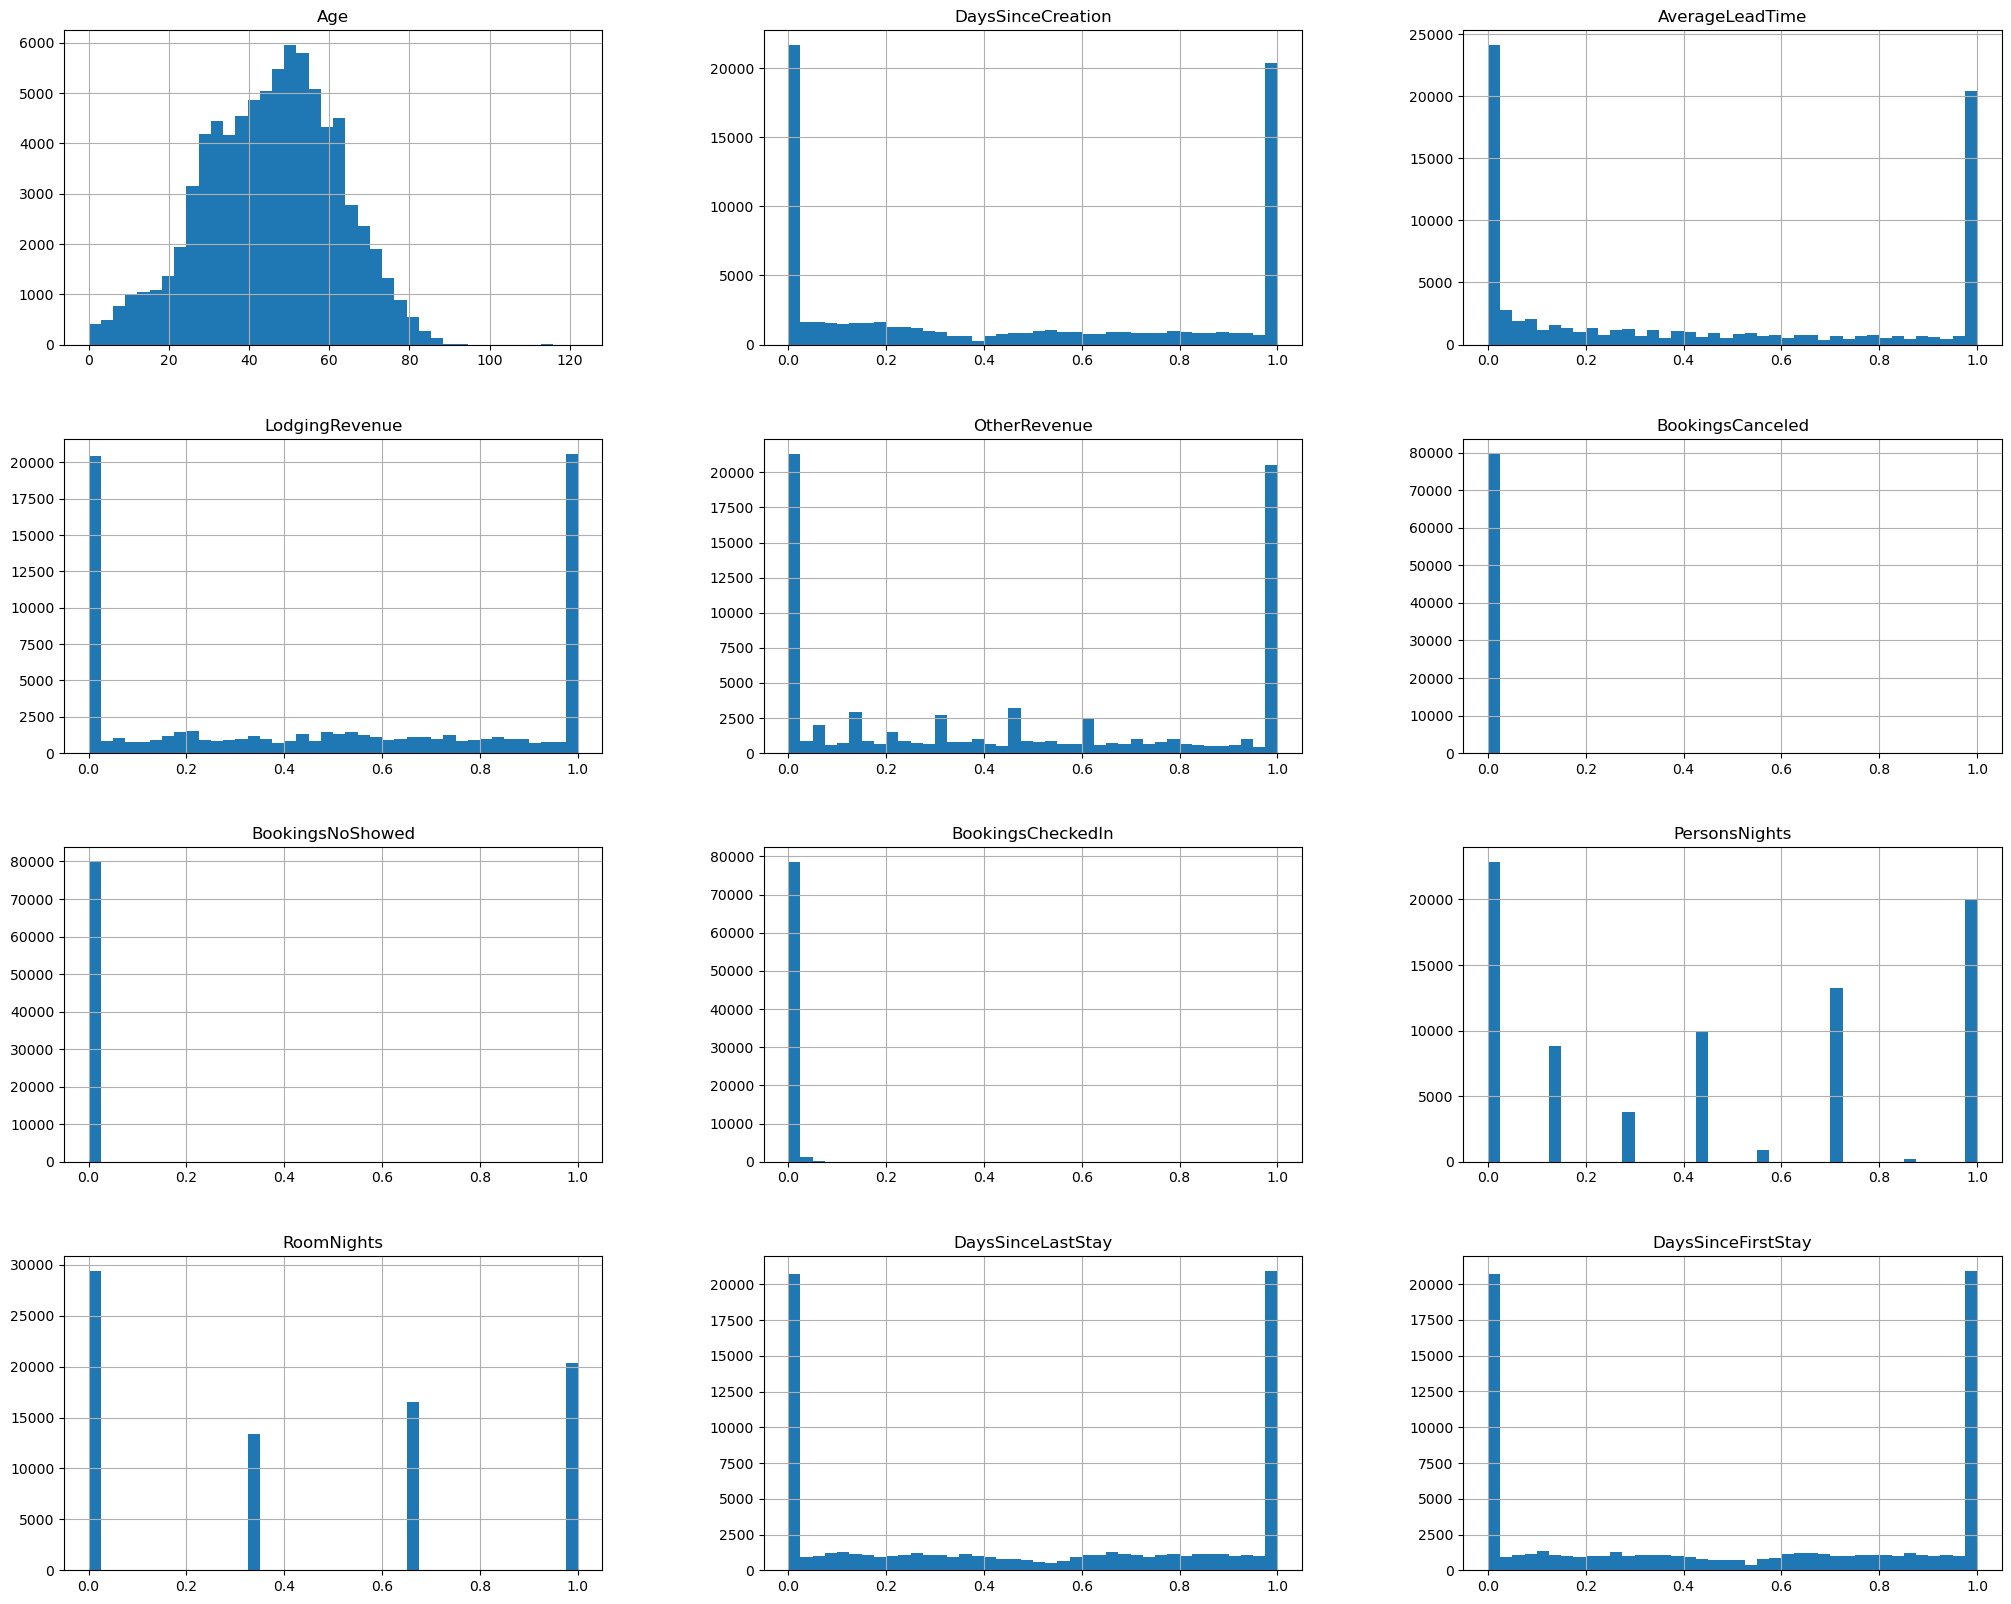

In [25]:
# Histogram
df.hist(bins=40, figsize=(25, 20))
plt.show()

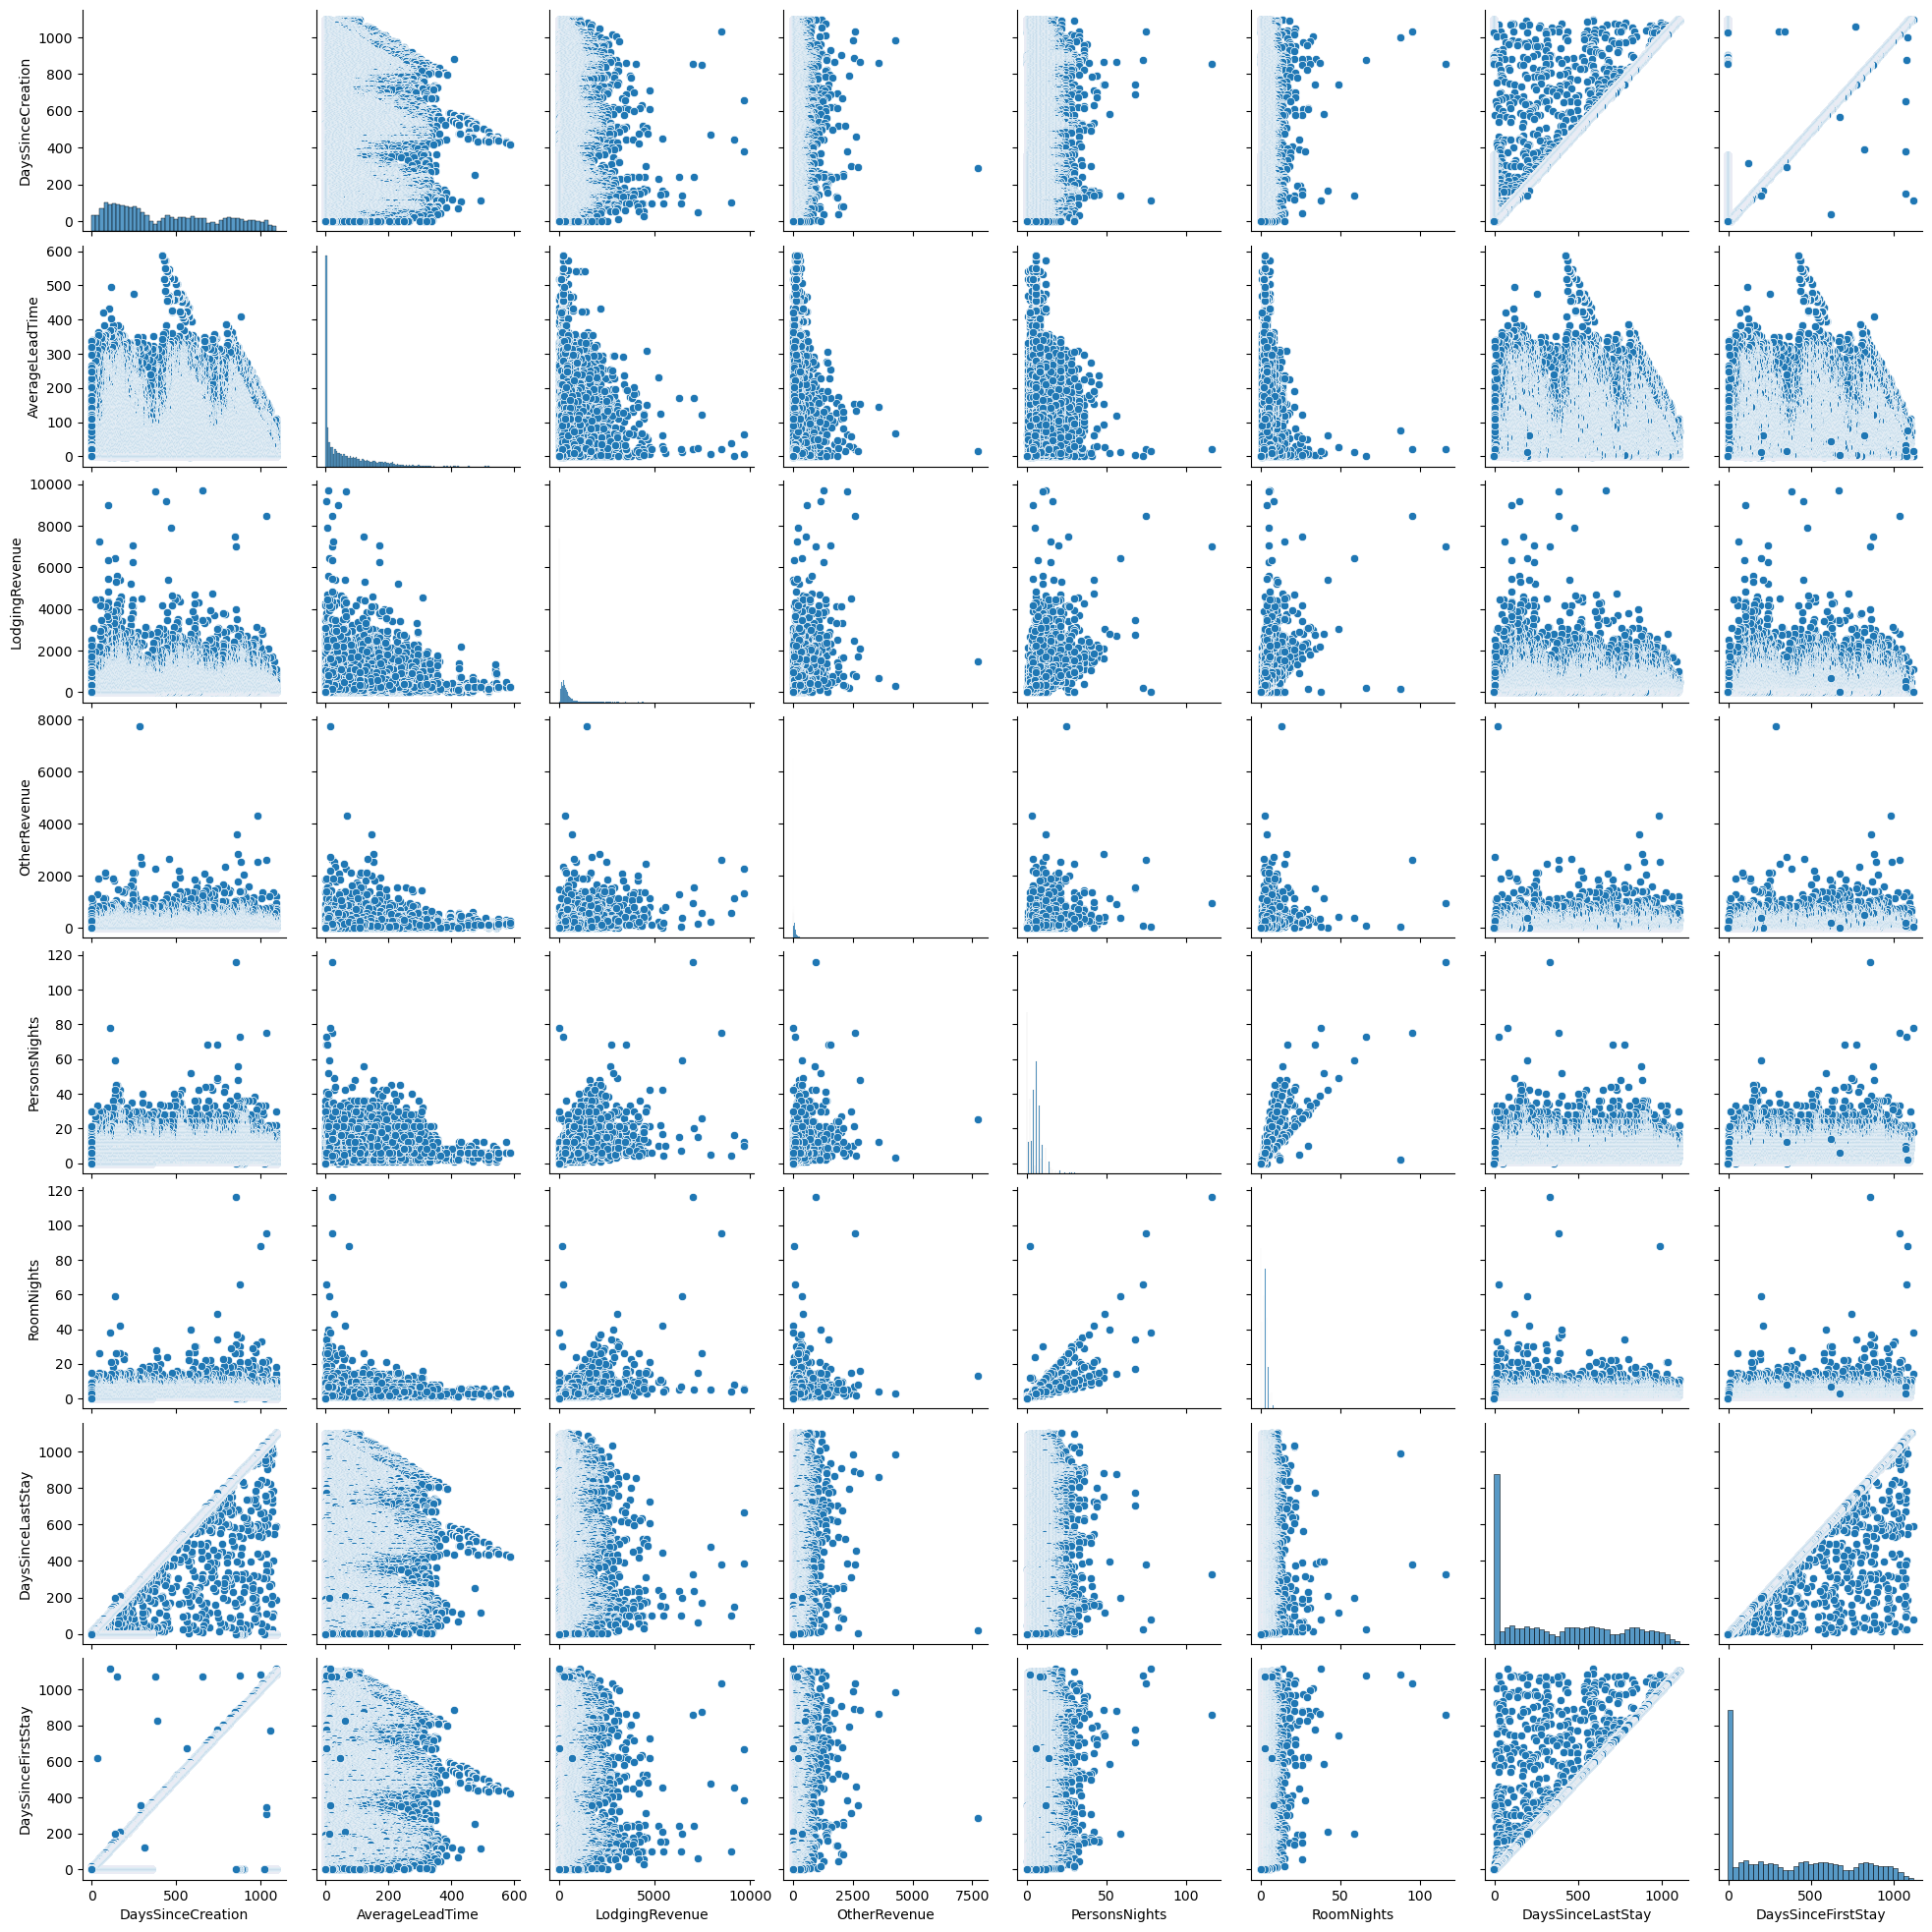

In [26]:
sns.pairplot(data = numeric_df)

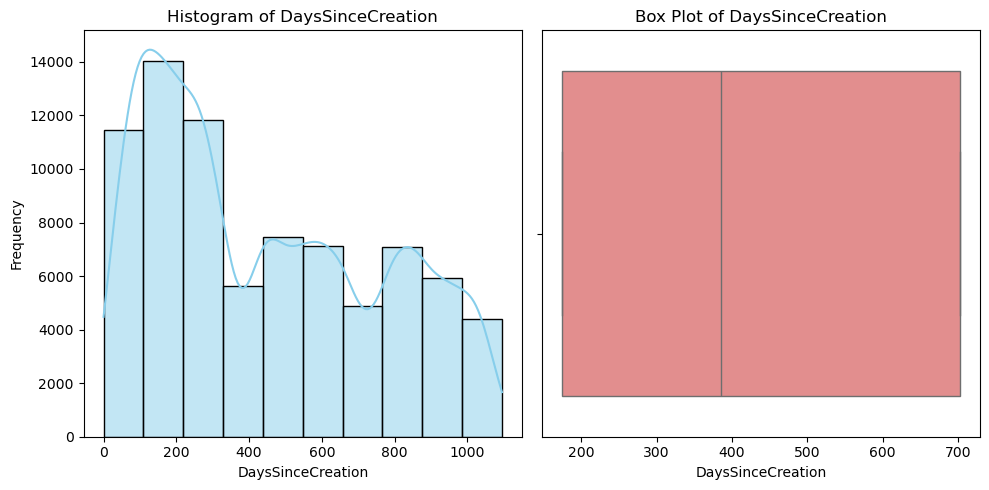

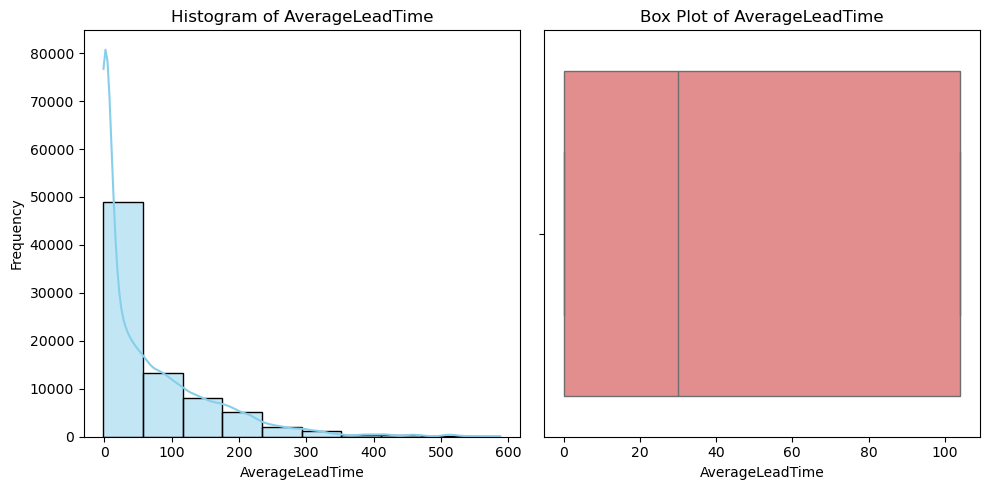

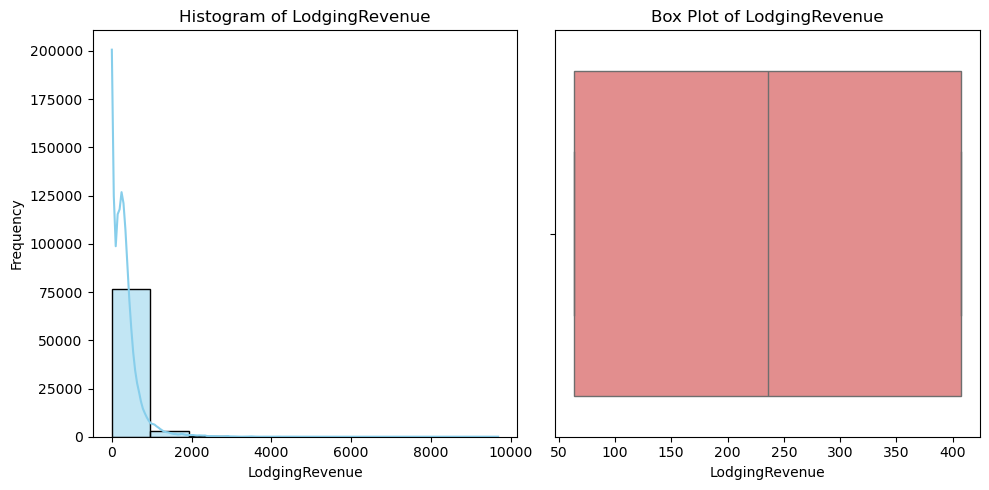

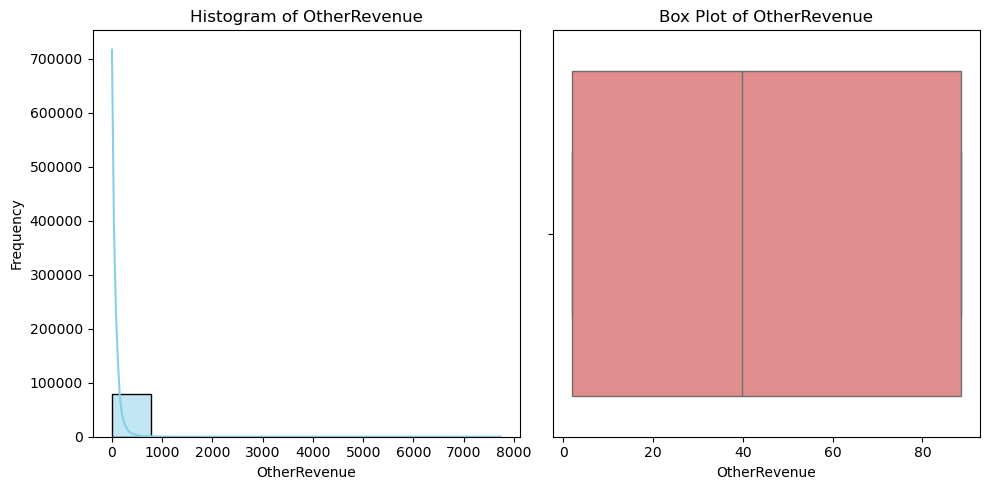

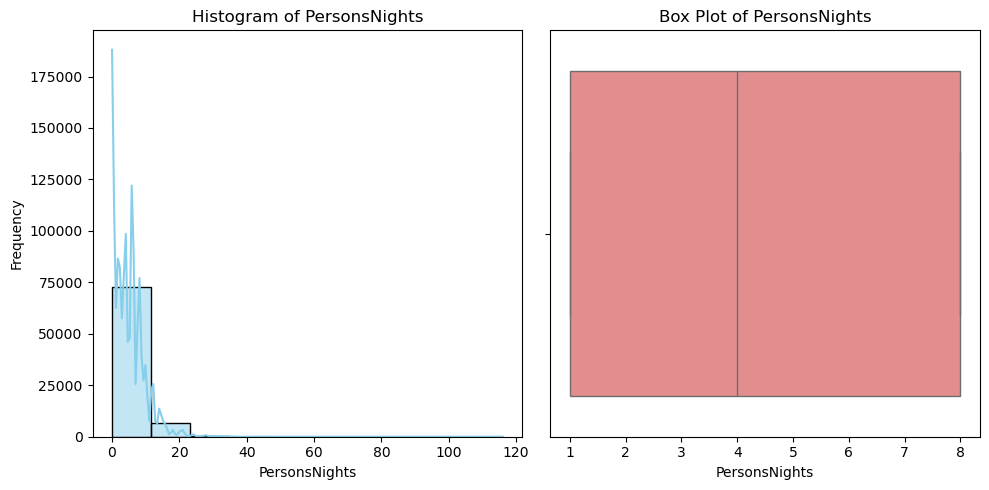

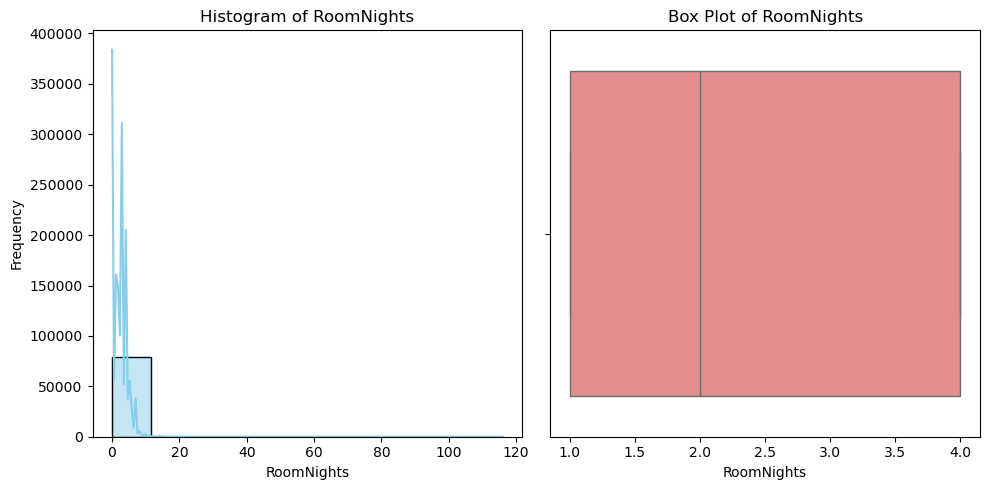

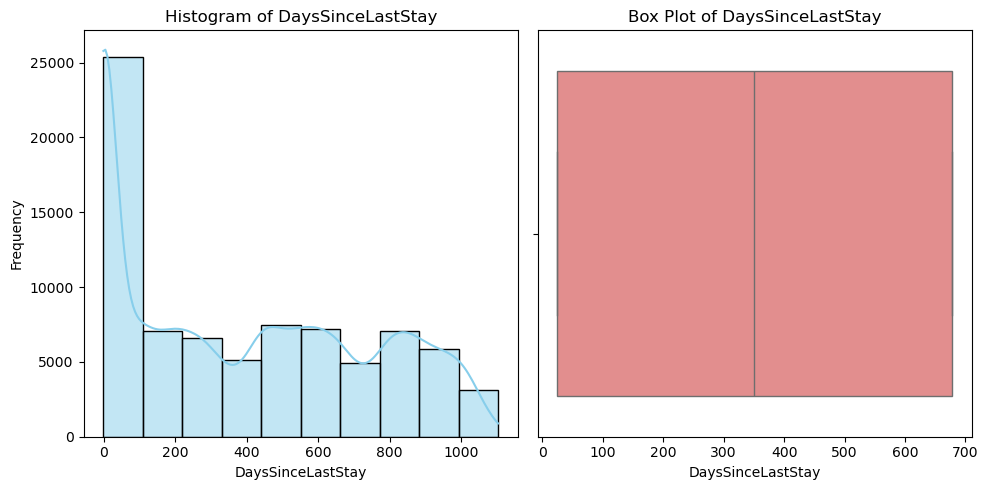

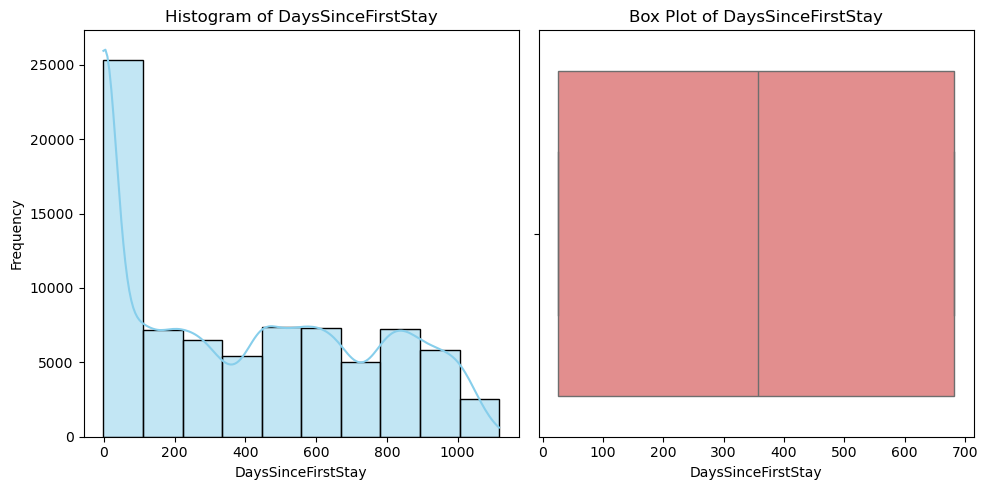

In [27]:
for col in numeric_df.columns:
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_winsorized[col], color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


In [28]:
df.dtypes

Nationality             object
Age                    float64
DaysSinceCreation      float64
AverageLeadTime        float64
LodgingRevenue         float64
OtherRevenue           float64
BookingsCanceled       float64
BookingsNoShowed       float64
BookingsCheckedIn      float64
PersonsNights          float64
RoomNights             float64
DaysSinceLastStay      float64
DaysSinceFirstStay     float64
DistributionChannel     object
MarketSegment           object
dtype: object

In [29]:
# Menampilkan nilai unik dari kolom 'DistributionChannel'
print('DistributionChannel')
print(df['DistributionChannel'].unique())

# Menampilkan nilai unik dari kolom 'MarketSegment'
print('MarketSegment')
print(df['MarketSegment'].unique())

DistributionChannel
['Corporate' 'Travel Agent/Operator' 'Direct' 'Electronic Distribution']
MarketSegment
['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Groups'
 'Complementary' 'Aviation']


In [30]:
# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Mengubah kolom 'DistributionChannel' dan 'MarketSegment' menjadi numerik
df['DistributionChannel'] = label_encoder.fit_transform(df['DistributionChannel']) + 1
df['MarketSegment'] = label_encoder.fit_transform(df['MarketSegment']) + 1

# Menampilkan 5 baris pertama untuk melihat hasilnya
df[['DistributionChannel', 'MarketSegment']].head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_3124\499046733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DistributionChannel'] = label_encoder.fit_transform(df['DistributionChannel']) + 1
C:\Users\ACER\AppData\Local\Temp\ipykernel_3124\499046733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MarketSegment'] = label_encoder.fit_transform(df['MarketSegment']) + 1


,DistributionChannel,MarketSegment
0,1,3
2,4,7
3,4,7
4,4,7
5,4,6


In [31]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
0,PRT,51.0,0.0,0.432692,0.895044,1.000000,0.111111,0.0,0.045455,1.000000,1.000000,0.192956,1.0,1,3
2,DEU,31.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,7
3,FRA,60.0,1.0,0.894231,0.513120,0.670520,0.000000,0.0,0.015152,1.000000,1.000000,1.000000,1.0,4,7
4,FRA,51.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,7
5,JPN,54.0,1.0,0.557692,0.483965,0.254335,0.000000,0.0,0.015152,0.428571,0.333333,1.000000,1.0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,6
83586,IRL,47.0,0.0,1.000000,0.767055,1.000000,0.000000,0.0,0.015152,0.714286,0.666667,0.000000,0.0,4,6
83587,IRL,53.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,6
83588,IRL,85.0,0.0,1.000000,1.000000,0.080925,0.000000,0.0,0.015152,0.714286,0.666667,0.000000,0.0,4,6


In [32]:
df.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment
0,PRT,51.0,0.0,0.432692,0.895044,1.000000,0.111111,0.0,0.045455,1.000000,1.000000,0.192956,1.0,1,3
2,DEU,31.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,7
3,FRA,60.0,1.0,0.894231,0.513120,0.670520,0.000000,0.0,0.015152,1.000000,1.000000,1.000000,1.0,4,7
4,FRA,51.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,7
5,JPN,54.0,1.0,0.557692,0.483965,0.254335,0.000000,0.0,0.015152,0.428571,0.333333,1.000000,1.0,4,6


In [33]:
# Menghitung jumlah kategori DistributionChannel
jumlah_kategori = df['DistributionChannel'].value_counts()

print(jumlah_kategori)

DistributionChannel
4    65676
2    11307
1     2318
3      493
Name: count, dtype: int64


In [34]:
# Menghitung jumlah kategori MarketSegment
jumlah_kategori = df['MarketSegment'].value_counts()

print(jumlah_kategori)

MarketSegment
6    46198
7    11247
4    10937
5     8857
3     1914
2      418
1      223
Name: count, dtype: int64


In [35]:
df1=df.iloc[:, [2,11,12]]
df1

,DaysSinceCreation,DaysSinceLastStay,DaysSinceFirstStay
0,0.0,0.192956,1.0
2,1.0,0.000000,0.0
3,1.0,1.000000,1.0
4,1.0,0.000000,0.0
5,1.0,1.000000,1.0
...,...,...,...
83585,0.0,0.000000,0.0
83586,0.0,0.000000,0.0
83587,0.0,0.000000,0.0
83588,0.0,0.000000,0.0


In [36]:
# Skala data menggunakan MinMaxScaler
scaler = MinMaxScaler()
scaled_df1 = scaler.fit_transform(df1)
scaled_df1

array([[0.        , 0.19295559, 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        ],
       ...,
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [37]:
df1.update(scaled_df1)

In [38]:
def optimise_k_means(df1, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df1)
        
        means.append(k)
        inertias.append(kmeans.inertia_)

    fig =plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.grid(True)
    plt.show()

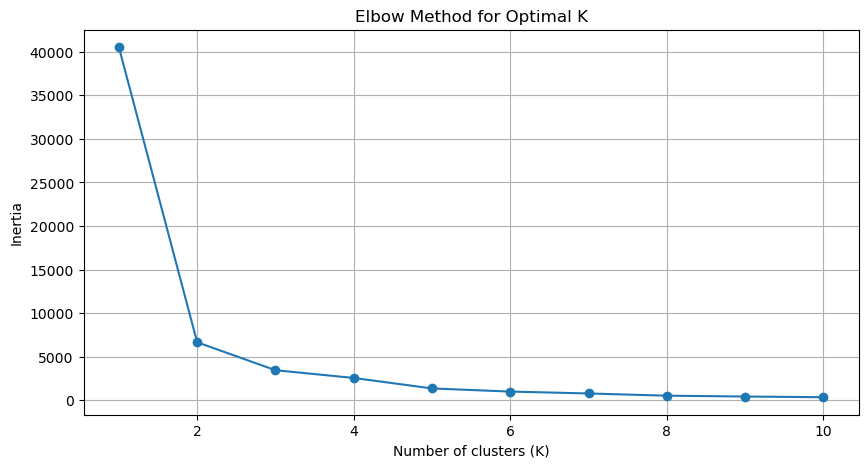

In [39]:
optimise_k_means(df1, 11)

In [70]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 32)
y_kmeans = kmeans.fit_predict(scaled_df1)

y_kmeans

array([2, 2, 1, ..., 0, 0, 0])

In [71]:
model_km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 32)
cluster_labels_km = model_km.fit_predict(scaled_df1)
centroids = model_km.cluster_centers_
centroids

array([[0.04425223, 0.04117908, 0.04074958],
       [0.96332889, 0.98017018, 0.98027976],
       [0.24161927, 0.33911701, 0.33948058],
       [0.58447609, 0.69801124, 0.70134134]])

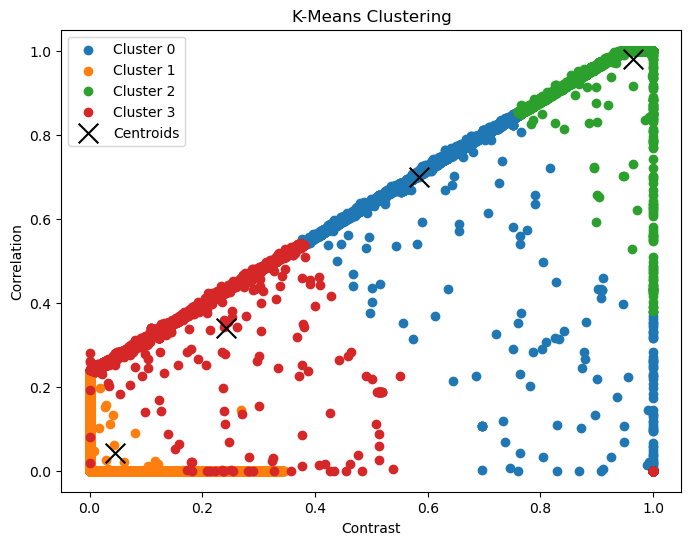

In [72]:
np.random.seed(42)
X = scaled_df1
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

labels = kmeans.labels_

plt.figure(figsize=(8, 6))

for i in range(num_clusters):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
marker='x', s=200, c='black', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Contrast')
plt.ylabel('Correlation')
plt.legend()
plt.show()

In [73]:
df['Cluster'] = kmeans.labels_

C:\Users\ACER\AppData\Local\Temp\ipykernel_3124\1179415533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


In [74]:
df1['Cluster'] = kmeans.labels_

C:\Users\ACER\AppData\Local\Temp\ipykernel_3124\881821258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster'] = kmeans.labels_


In [68]:
df1

,DaysSinceCreation,DaysSinceLastStay,DaysSinceFirstStay,Cluster
0,0.0,0.192956,1.0,1
2,1.0,0.000000,0.0,1
3,1.0,1.000000,1.0,0
4,1.0,0.000000,0.0,1
5,1.0,1.000000,1.0,0
...,...,...,...,...
83585,0.0,0.000000,0.0,1
83586,0.0,0.000000,0.0,1
83587,0.0,0.000000,0.0,1
83588,0.0,0.000000,0.0,1


In [46]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,Cluster
0,PRT,51.0,0.0,0.432692,0.895044,1.000000,0.111111,0.0,0.045455,1.000000,1.000000,0.192956,1.0,1,3,3
2,DEU,31.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,7,3
3,FRA,60.0,1.0,0.894231,0.513120,0.670520,0.000000,0.0,0.015152,1.000000,1.000000,1.000000,1.0,4,7,2
4,FRA,51.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,7,3
5,JPN,54.0,1.0,0.557692,0.483965,0.254335,0.000000,0.0,0.015152,0.428571,0.333333,1.000000,1.0,4,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,6,1
83586,IRL,47.0,0.0,1.000000,0.767055,1.000000,0.000000,0.0,0.015152,0.714286,0.666667,0.000000,0.0,4,6,1
83587,IRL,53.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,6,1
83588,IRL,85.0,0.0,1.000000,1.000000,0.080925,0.000000,0.0,0.015152,0.714286,0.666667,0.000000,0.0,4,6,1


In [47]:
# Kamus yang memetakan negara ke benua
continent_map = {
    # Amerika
    'USA': 'Amerika', 'CAN': 'Amerika', 'MEX': 'Amerika', 'BRA': 'Amerika', 'ARG': 'Amerika',
    'CRI': 'Amerika', 'COL': 'Amerika', 'VEN': 'Amerika', 'PER': 'Amerika', 'CHL': 'Amerika',
    'PAN': 'Amerika', 'PRY': 'Amerika', 'ECU': 'Amerika', 'BOL': 'Amerika', 'URY': 'Amerika',
    'CUB': 'Amerika', 'JAM': 'Amerika', 'DMA': 'Amerika', 'GUY': 'Amerika', 'SLV': 'Amerika',
    'HTI': 'Amerika', 'ATG': 'Amerika', 'AIA': 'Amerika', 'GTM': 'Amerika', 'PRI': 'Amerika',
    'VIR': 'Amerika', 'BRB': 'Amerika', 'ABW': 'Amerika', 'CYM': 'Amerika', 'SPM': 'Amerika',
    'UMI': 'Amerika', 'GUF': 'Amerika', 'ASM': 'Amerika',

    # Eropa
    'PRT': 'Eropa', 'DEU': 'Eropa', 'FRA': 'Eropa', 'IRL': 'Eropa', 'ESP': 'Eropa', 'BEL': 'Eropa',
    'NLD': 'Eropa', 'AUT': 'Eropa', 'ITA': 'Eropa', 'POL': 'Eropa', 'CHE': 'Eropa', 'GBR': 'Eropa',
    'BIH': 'Eropa', 'FIN': 'Eropa', 'HUN': 'Eropa', 'ROU': 'Eropa', 'CZE': 'Eropa', 'SVN': 'Eropa',
    'AND': 'Eropa', 'SVK': 'Eropa', 'LUX': 'Eropa', 'LVA': 'Eropa', 'LTU': 'Eropa', 'EST': 'Eropa',
    'SRB': 'Eropa', 'RUS': 'Eropa', 'GRC': 'Eropa', 'DNK': 'Eropa', 'NOR': 'Eropa', 'SWE': 'Eropa',
    'ISL': 'Eropa', 'CYP': 'Eropa', 'BGR': 'Eropa', 'HRV': 'Eropa', 'MNE': 'Eropa', 'MKD': 'Eropa',
    'ALB': 'Eropa', 'MCO': 'Eropa', 'SMR': 'Eropa', 'LIE': 'Eropa', 'GIB': 'Eropa', 'JEY': 'Eropa',

    # Asia
    'JPN': 'Asia', 'CHN': 'Asia', 'KOR': 'Asia', 'IND': 'Asia', 'IDN': 'Asia', 'TWN': 'Asia',
    'THA': 'Asia', 'SGP': 'Asia', 'MYS': 'Asia', 'ISR': 'Asia', 'PHL': 'Asia', 'IRN': 'Asia',
    'KAZ': 'Asia', 'UZB': 'Asia', 'BGD': 'Asia', 'LKA': 'Asia', 'MMR': 'Asia', 'PAK': 'Asia',
    'SYR': 'Asia', 'TUR': 'Asia', 'IRQ': 'Asia', 'JOR': 'Asia', 'KWT': 'Asia', 'QAT': 'Asia',
    'SAU': 'Asia', 'LBN': 'Asia', 'ARE': 'Asia', 'TJK': 'Asia', 'TMP': 'Asia', 'ARM': 'Asia',
    'AZE': 'Asia', 'LAO': 'Asia', 'VNM': 'Asia', 'KIR': 'Asia', 'YEM': 'Asia', 'KGZ': 'Asia',
    'NPL': 'Asia', 'MRT': 'Asia',

    # Afrika
    'ZAF': 'Afrika', 'MAR': 'Afrika', 'EGY': 'Afrika', 'KEN': 'Afrika', 'NGA': 'Afrika',
    'TUN': 'Afrika', 'MOZ': 'Afrika', 'DZA': 'Afrika', 'MLI': 'Afrika', 'UGA': 'Afrika',
    'GHA': 'Afrika', 'SEN': 'Afrika', 'GAB': 'Afrika', 'TGO': 'Afrika', 'NAM': 'Afrika',
    'COD': 'Afrika', 'BEN': 'Afrika', 'ZWE': 'Afrika', 'CMR': 'Afrika', 'CAF': 'Afrika',
    'GIN': 'Afrika', 'SLE': 'Afrika', 'STP': 'Afrika', 'SDN': 'Afrika', 'ERI': 'Afrika',
    'MDG': 'Afrika', 'COM': 'Afrika', 'GNQ': 'Afrika', 'RWA': 'Afrika', 'MLT': 'Afrika',
    'LBR': 'Afrika', 'GNB': 'Afrika',

    # Australia dan Oceania
    'AUS': 'Australia', 'NZL': 'Australia', 'FJI': 'Australia', 'WSM': 'Australia', 'TON': 'Australia',
    'PYF': 'Australia', 'NCL': 'Australia', 'WLF': 'Australia', 'NRU': 'Australia', 'KIR': 'Australia',
    'TMP': 'Australia',

    # Lainnya atau tidak jelas
    'ATA': 'Antartika', 'ATF': 'Antartika',
}

# Fungsi untuk mengelompokkan negara ke benua
def categorize_nationality(nationality):
    return continent_map.get(nationality, 'Lainnya')  # 'Lainnya' jika negara tidak ada dalam map

# Terapkan fungsi ini ke kolom Nationality
df['Continent'] = df['Nationality'].apply(categorize_nationality)

# Tampilkan beberapa baris untuk melihat hasil
df[['Nationality', 'Continent']]

C:\Users\ACER\AppData\Local\Temp\ipykernel_3124\1432299294.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Continent'] = df['Nationality'].apply(categorize_nationality)


,Nationality,Continent
0,PRT,Eropa
2,DEU,Eropa
3,FRA,Eropa
4,FRA,Eropa
5,JPN,Asia
...,...,...
83585,ITA,Eropa
83586,IRL,Eropa
83587,IRL,Eropa
83588,IRL,Eropa


In [48]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,Cluster,Continent
0,PRT,51.0,0.0,0.432692,0.895044,1.000000,0.111111,0.0,0.045455,1.000000,1.000000,0.192956,1.0,1,3,3,Eropa
2,DEU,31.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,7,3,Eropa
3,FRA,60.0,1.0,0.894231,0.513120,0.670520,0.000000,0.0,0.015152,1.000000,1.000000,1.000000,1.0,4,7,2,Eropa
4,FRA,51.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,7,3,Eropa
5,JPN,54.0,1.0,0.557692,0.483965,0.254335,0.000000,0.0,0.015152,0.428571,0.333333,1.000000,1.0,4,6,2,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,6,1,Eropa
83586,IRL,47.0,0.0,1.000000,0.767055,1.000000,0.000000,0.0,0.015152,0.714286,0.666667,0.000000,0.0,4,6,1,Eropa
83587,IRL,53.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,6,1,Eropa
83588,IRL,85.0,0.0,1.000000,1.000000,0.080925,0.000000,0.0,0.015152,0.714286,0.666667,0.000000,0.0,4,6,1,Eropa


C:\Users\ACER\AppData\Local\Temp\ipykernel_3124\2625096947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'kategori_usia'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


        Age kategori_usia
0      51.0        Dewasa
2      31.0        Dewasa
3      60.0           Tua
4      51.0        Dewasa
5      54.0        Dewasa
...     ...           ...
83585  54.0        Dewasa
83586  47.0        Dewasa
83587  53.0        Dewasa
83588  85.0           Tua
83589  13.0        Remaja

[79794 rows x 2 columns]


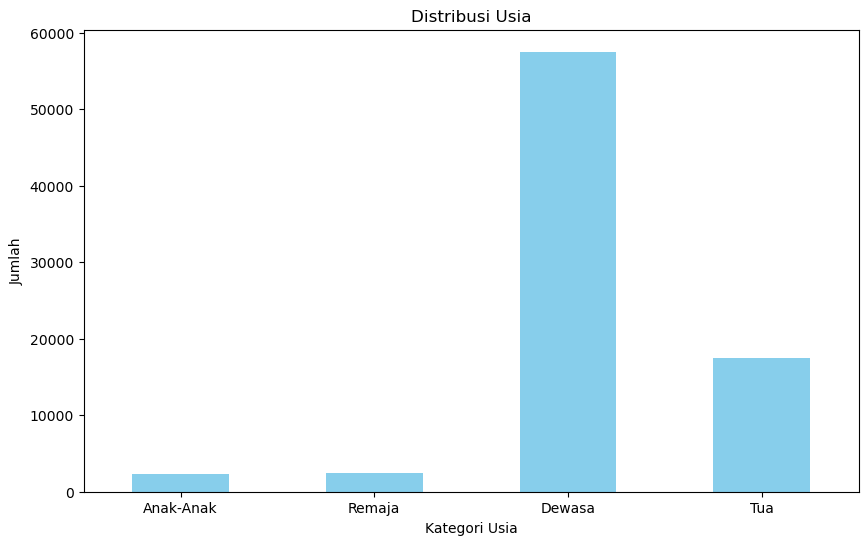

In [49]:
# Buat kategori usia
bins = [0, 12, 19, 59, 130]  # Definisi rentang usia
labels = ['Anak-Anak', 'Remaja', 'Dewasa', 'Tua']  # Label kategori
df.loc[:, 'kategori_usia'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Tampilkan data dengan kategori usia
print(df[['Age', 'kategori_usia']])

# Buat histogram
plt.figure(figsize=(10, 6))
df['kategori_usia'].value_counts(sort=False).plot(kind='bar', color='skyblue')
plt.title('Distribusi Usia')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [50]:
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,Cluster,Continent,kategori_usia
0,PRT,51.0,0.0,0.432692,0.895044,1.000000,0.111111,0.0,0.045455,1.000000,1.000000,0.192956,1.0,1,3,3,Eropa,Dewasa
2,DEU,31.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,7,3,Eropa,Dewasa
3,FRA,60.0,1.0,0.894231,0.513120,0.670520,0.000000,0.0,0.015152,1.000000,1.000000,1.000000,1.0,4,7,2,Eropa,Tua
4,FRA,51.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,7,3,Eropa,Dewasa
5,JPN,54.0,1.0,0.557692,0.483965,0.254335,0.000000,0.0,0.015152,0.428571,0.333333,1.000000,1.0,4,6,2,Asia,Dewasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,6,1,Eropa,Dewasa
83586,IRL,47.0,0.0,1.000000,0.767055,1.000000,0.000000,0.0,0.015152,0.714286,0.666667,0.000000,0.0,4,6,1,Eropa,Dewasa
83587,IRL,53.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4,6,1,Eropa,Dewasa
83588,IRL,85.0,0.0,1.000000,1.000000,0.080925,0.000000,0.0,0.015152,0.714286,0.666667,0.000000,0.0,4,6,1,Eropa,Tua


In [51]:
df2=df.copy()

In [52]:
df2.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,Cluster
count,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000,79794.000000
mean,45.409229,0.463842,0.428537,0.497596,0.467659,0.000205,0.000192,0.012014,0.461234,0.450147,0.501099,0.501565,3.623267,5.648934,1.475211
std,16.556284,0.413401,0.416523,0.402489,0.404535,0.007324,0.009438,0.010462,0.397301,0.404988,0.410566,0.410366,0.832176,1.023005,0.933057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015152,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,1.000000
50%,46.000000,0.398866,0.288462,0.501458,0.436994,0.000000,0.000000,0.015152,0.428571,0.333333,0.497703,0.504573,4.000000,6.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.015152,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,2.000000
max,122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,7.000000,3.000000


In [53]:
# Mendapatkan nilai unik dari kolom 'Cluster'
unique_clusters = df2['Cluster'].unique()

# Menghitung jumlah klaster unik
num_clusters = len(unique_clusters)

print(f"Ada {num_clusters} klaster di dalam kolom 'Cluster': {unique_clusters}")


Ada 4 klaster di dalam kolom 'Cluster': [3 2 0 1]


Anak-Anak: 51
Dewasa: 9382
Remaja: 201
Tua: 3044
________________________________________________________
Customer terbanyak di Cluster 0: 9382(Dewasa)
Customer paling sedikit di Cluster 0: 51(Anak-Anak)


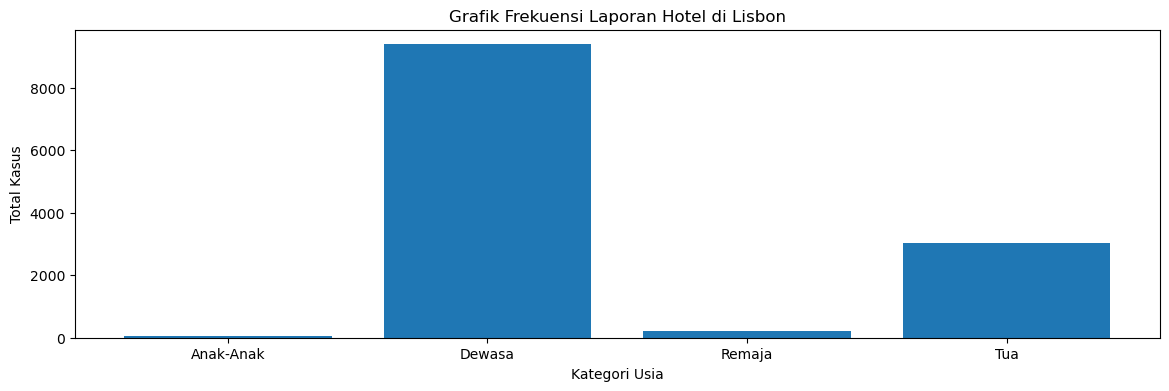

In [54]:
c0=df2[(df2['Cluster']==0)]
data = c0['kategori_usia']
hitung = Counter(data)
df_urut = sorted(hitung.items(), key=lambda x: x[0])

for item in df_urut:
    print(f'{item[0]}: {item[1]}')

nilai_maksimum = max(hitung, key=hitung.get)
nilai_minimum = min(hitung, key=hitung.get)

print('________________________________________________________')
print(f'Customer terbanyak di Cluster 0: {hitung[nilai_maksimum]}({nilai_maksimum})')
print(f'Customer paling sedikit di Cluster 0: {hitung[nilai_minimum]}({nilai_minimum})')

kunci = [item[0] for item in df_urut]
frekuensi = [item[1] for item in df_urut]
        
plt.figure(figsize=(14, 4))
plt.bar(kunci, frekuensi)
plt.xlabel('Kategori Usia')
plt.ylabel('Total Kasus')
plt.title('Grafik Frekuensi Laporan Hotel di Lisbon')
plt.show()

Anak-Anak: 2014
Dewasa: 19536
Remaja: 1782
Tua: 5293
________________________________________________________
Customer terbanyak di Cluster 1: 19536(Dewasa)
Customer paling sedikit di Cluster 1: 1782(Remaja)


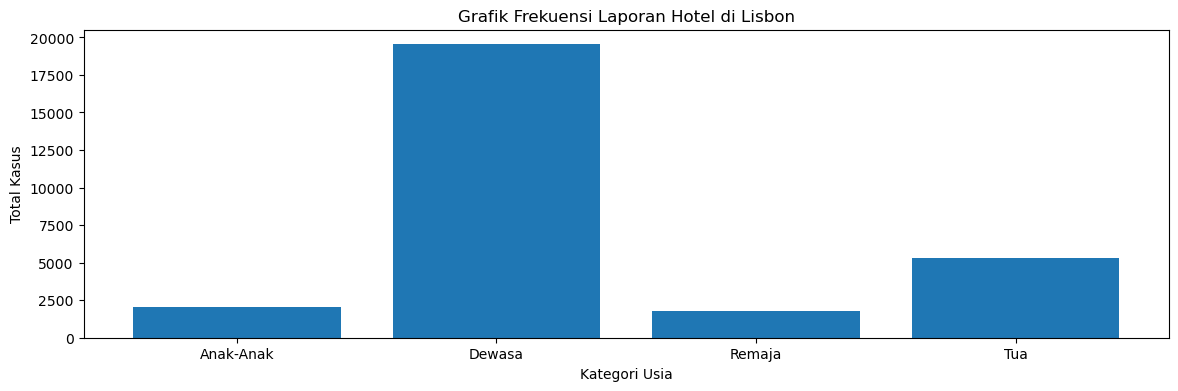

In [55]:
c1=df2[(df2['Cluster']==1)]
data = c1['kategori_usia']
hitung = Counter(data)
df_urut = sorted(hitung.items(), key=lambda x: x[0])

for item in df_urut:
    print(f'{item[0]}: {item[1]}')

nilai_maksimum = max(hitung, key=hitung.get)
nilai_minimum = min(hitung, key=hitung.get)

print('________________________________________________________')
print(f'Customer terbanyak di Cluster 1: {hitung[nilai_maksimum]}({nilai_maksimum})')
print(f'Customer paling sedikit di Cluster 1: {hitung[nilai_minimum]}({nilai_minimum})')

kunci = [item[0] for item in df_urut]
frekuensi = [item[1] for item in df_urut]
        
plt.figure(figsize=(14, 4))
plt.bar(kunci, frekuensi)
plt.xlabel('Kategori Usia')
plt.ylabel('Total Kasus')
plt.title('Grafik Frekuensi Laporan Hotel di Lisbon')
plt.show()

Anak-Anak: 115
Dewasa: 19465
Remaja: 308
Tua: 6497
________________________________________________________
Customer terbanyak di Cluster 2: 19465(Dewasa)
Customer paling sedikit di Cluster 2: 115(Anak-Anak)


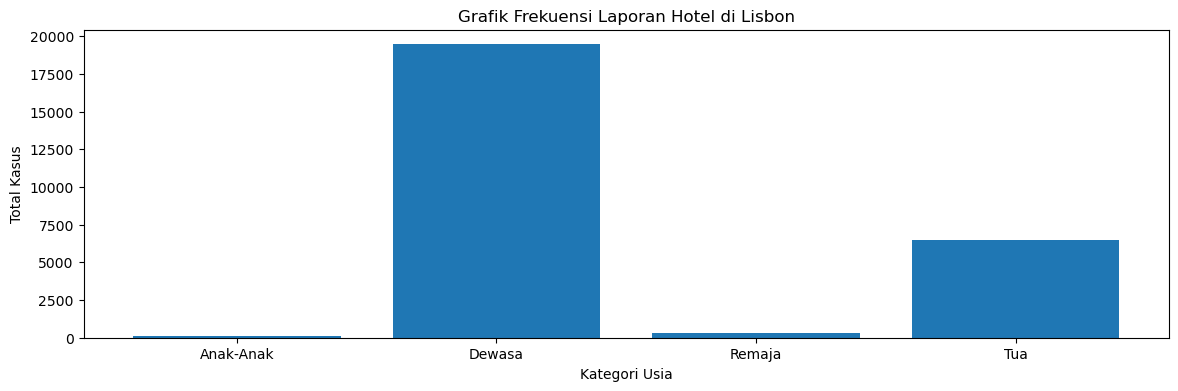

In [56]:
c2=df2[(df2['Cluster']==2)]
data = c2['kategori_usia']
hitung = Counter(data)
df_urut = sorted(hitung.items(), key=lambda x: x[0])

for item in df_urut:
    print(f'{item[0]}: {item[1]}')

nilai_maksimum = max(hitung, key=hitung.get)
nilai_minimum = min(hitung, key=hitung.get)

print('________________________________________________________')
print(f'Customer terbanyak di Cluster 2: {hitung[nilai_maksimum]}({nilai_maksimum})')
print(f'Customer paling sedikit di Cluster 2: {hitung[nilai_minimum]}({nilai_minimum})')

kunci = [item[0] for item in df_urut]
frekuensi = [item[1] for item in df_urut]
        
plt.figure(figsize=(14, 4))
plt.bar(kunci, frekuensi)
plt.xlabel('Kategori Usia')
plt.ylabel('Total Kasus')
plt.title('Grafik Frekuensi Laporan Hotel di Lisbon')
plt.show()

Afrika: 101
Amerika: 1253
Antartika: 1
Asia: 506
Australia: 161
Eropa: 10608
Lainnya: 48
________________________________________________________
Benua terbanyak di Cluster 0: 10608(Eropa)
Benua paling sedikit di Cluster 0: 1(Antartika)


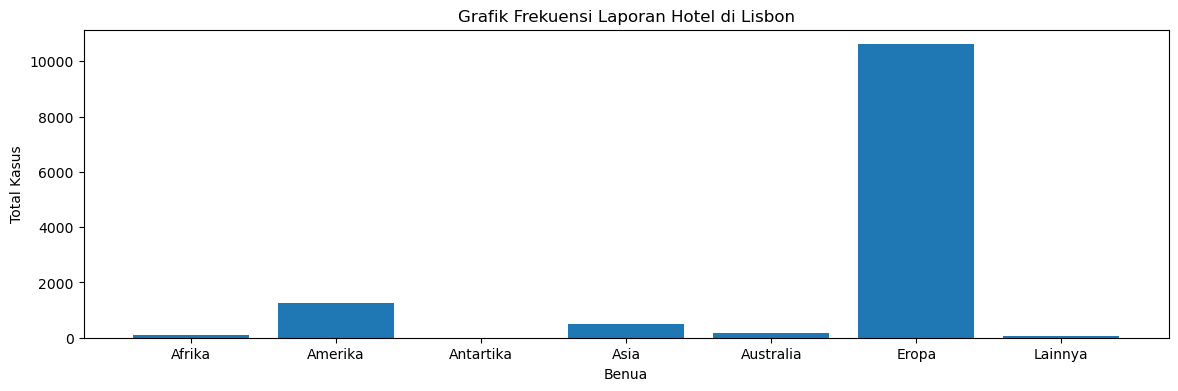

In [57]:
c0=df2[(df2['Cluster']==0)]
data = c0['Continent']
hitung = Counter(data)
df_urut = sorted(hitung.items(), key=lambda x: x[0])

for item in df_urut:
    print(f'{item[0]}: {item[1]}')

nilai_maksimum = max(hitung, key=hitung.get)
nilai_minimum = min(hitung, key=hitung.get)

print('________________________________________________________')
print(f'Benua terbanyak di Cluster 0: {hitung[nilai_maksimum]}({nilai_maksimum})')
print(f'Benua paling sedikit di Cluster 0: {hitung[nilai_minimum]}({nilai_minimum})')

kunci = [item[0] for item in df_urut]
frekuensi = [item[1] for item in df_urut]
        
plt.figure(figsize=(14, 4))
plt.bar(kunci, frekuensi)
plt.xlabel('Benua')
plt.ylabel('Total Kasus')
plt.title('Grafik Frekuensi Laporan Hotel di Lisbon')
plt.show()

Afrika: 181
Amerika: 3870
Antartika: 8
Asia: 1208
Australia: 384
Eropa: 22794
Lainnya: 180
________________________________________________________
Benua terbanyak di Cluster 1: 22794(Eropa)
Benua paling sedikit di Cluster 1: 8(Antartika)


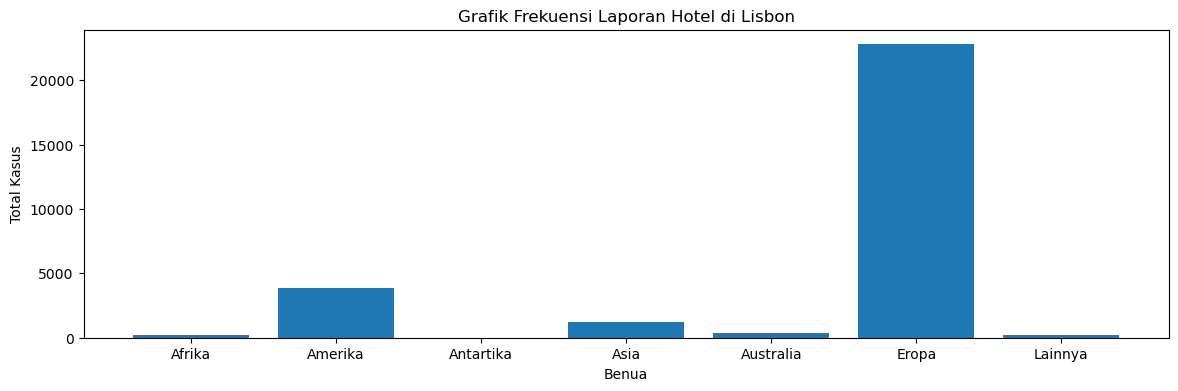

In [58]:
c1=df2[(df2['Cluster']==1)]
data = c1['Continent']
hitung = Counter(data)
df_urut = sorted(hitung.items(), key=lambda x: x[0])

for item in df_urut:
    print(f'{item[0]}: {item[1]}')

nilai_maksimum = max(hitung, key=hitung.get)
nilai_minimum = min(hitung, key=hitung.get)

print('________________________________________________________')
print(f'Benua terbanyak di Cluster 1: {hitung[nilai_maksimum]}({nilai_maksimum})')
print(f'Benua paling sedikit di Cluster 1: {hitung[nilai_minimum]}({nilai_minimum})')

kunci = [item[0] for item in df_urut]
frekuensi = [item[1] for item in df_urut]
        
plt.figure(figsize=(14, 4))
plt.bar(kunci, frekuensi)
plt.xlabel('Benua')
plt.ylabel('Total Kasus')
plt.title('Grafik Frekuensi Laporan Hotel di Lisbon')
plt.show()

Afrika: 233
Amerika: 2046
Antartika: 2
Asia: 1045
Australia: 176
Eropa: 22765
Lainnya: 118
________________________________________________________
Benua terbanyak di Cluster 2: 22765(Eropa)
Benua paling sedikit di Cluster 2: 2(Antartika)


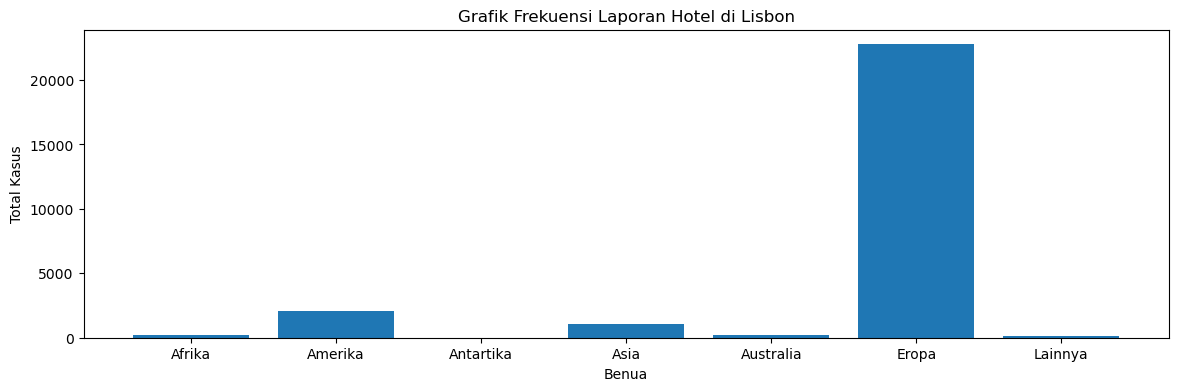

In [59]:
c2=df2[(df2['Cluster']==2)]
data = c2['Continent']
hitung = Counter(data)
df_urut = sorted(hitung.items(), key=lambda x: x[0])

for item in df_urut:
    print(f'{item[0]}: {item[1]}')

nilai_maksimum = max(hitung, key=hitung.get)
nilai_minimum = min(hitung, key=hitung.get)

print('________________________________________________________')
print(f'Benua terbanyak di Cluster 2: {hitung[nilai_maksimum]}({nilai_maksimum})')
print(f'Benua paling sedikit di Cluster 2: {hitung[nilai_minimum]}({nilai_minimum})')

kunci = [item[0] for item in df_urut]
frekuensi = [item[1] for item in df_urut]
        
plt.figure(figsize=(14, 4))
plt.bar(kunci, frekuensi)
plt.xlabel('Benua')
plt.ylabel('Total Kasus')
plt.title('Grafik Frekuensi Laporan Hotel di Lisbon')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


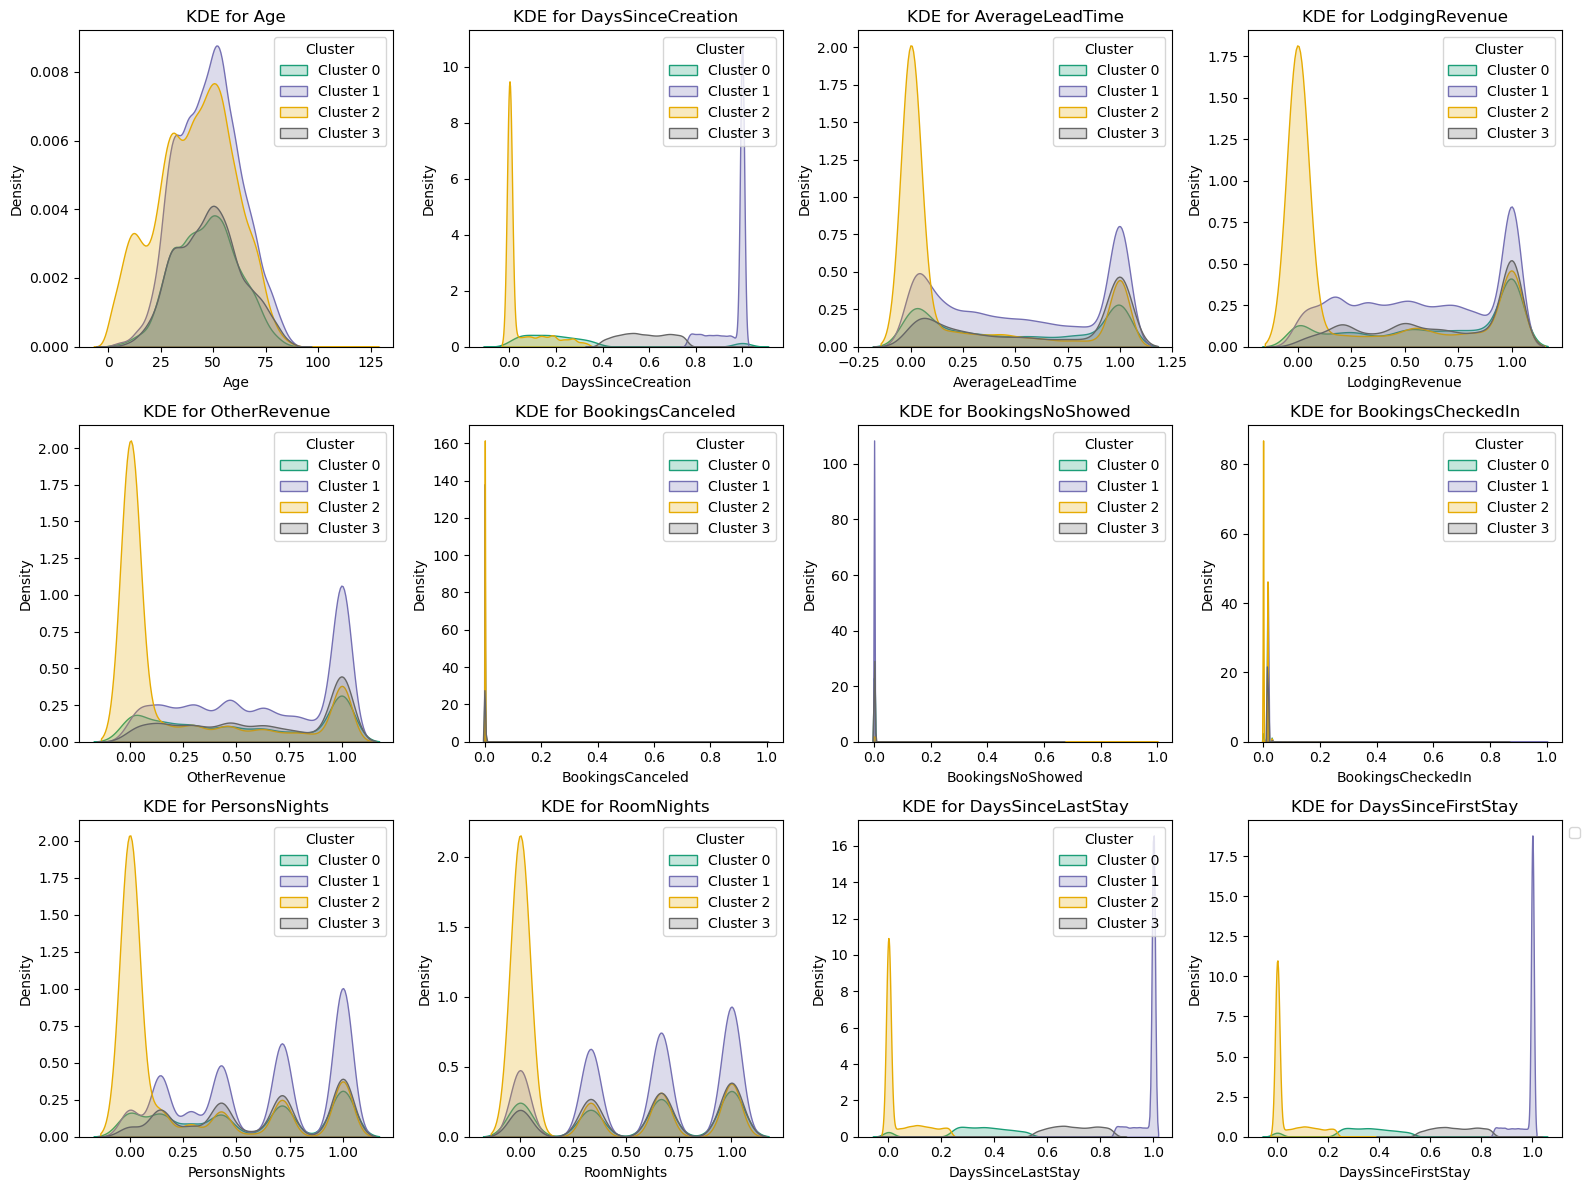

In [60]:
numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns
palette = 'Dark2_r'
num_cols = 4
num_rows = -(-len(numeric_cols) // num_cols) 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

for i, col in enumerate(numeric_cols):
    row = i // num_cols
    col_idx = i % num_cols
    sns.kdeplot(data=df2, x=col, hue="Cluster", palette=palette, fill=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'KDE for {col}')
    axes[row, col_idx].legend(title="Cluster", labels=[f'Cluster {c}'for c in sorted(df2["Cluster"].unique())])

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
# Memilih hanya kolom numerik atau mengonversi kolom kategori menjadi numerik
df_numerik = pd.get_dummies(df1.drop(columns=['Cluster']))

# Mendapatkan label klaster
labels = df1['Cluster'].values

# Evaluasi klasterisasi menggunakan Silhouette Score
sil_score = silhouette_score(df_numerik, labels)

# Menampilkan hasil evaluasi sebagai persentase
print(f'Silhouette Score untuk klasterisasi adalah: {sil_score * 100:.2f}%')

Silhouette Score untuk klasterisasi adalah: 67.05%


For n_clusters = 2, Silhouette Score = 0.7332440473544202
For n_clusters = 3, Silhouette Score = 0.6846485860634572
For n_clusters = 4, Silhouette Score = 0.6705022056071356
For n_clusters = 5, Silhouette Score = 0.6456393665570105

Silhouette Score yang paling tinggi adalah untuk 2 Cluster

Jadi, jumlah Cluster terbaik pada metode Silhouette Coefficient adalah 2 Cluster


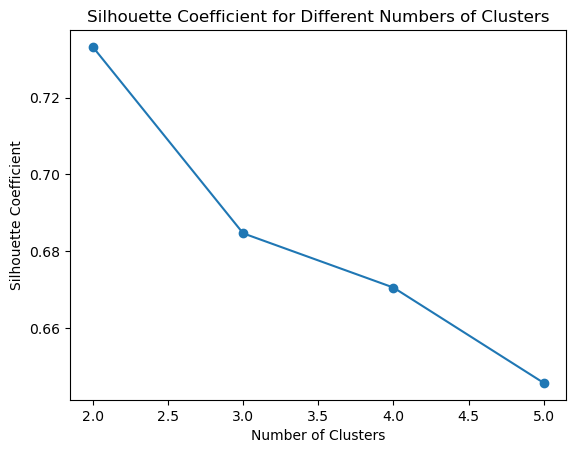

In [62]:
silhouette_scores = []

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df1)
    silhouette_avg = silhouette_score(scaled_df1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, Silhouette Score = {silhouette_avg}")
    
max_silhouette_score = max(silhouette_scores)
optimal_num_clusters = silhouette_scores.index(max_silhouette_score) + 2
print(f"\nSilhouette Score yang paling tinggi adalah untuk {optimal_num_clusters} Cluster")
print(f"\nJadi, jumlah Cluster terbaik pada metode Silhouette Coefficient adalah {optimal_num_clusters} Cluster")

plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data dari file CSV
df = pd.read_csv('file_data.csv')  # Ganti 'file_data.csv' dengan nama file CSV kamu

# Memilih kolom numerik
numeric_df = df.select_dtypes(include=['number']).drop(columns=['BookingsCanceled', 'BookingsNoShowed'])

# Melakukan klasterisasi
kmeans = KMeans(n_clusters=3, random_state=42)  # Ganti jumlah klaster sesuai kebutuhan
kmeans.fit(numeric_df)
labels = kmeans.labels_

# Evaluasi klasterisasi
silhouette_avg = silhouette_score(numeric_df, labels)
davies_bouldin_avg = davies_bouldin_score(numeric_df, labels)
calinski_harabasz_avg = calinski_harabasz_score(numeric_df, labels)

print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg:.2f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}')

# Visualisasi klaster menggunakan t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(numeric_df)

df['tsne-2d-one'] = tsne_results[:, 0]
df['tsne-2d-two'] = tsne_results[:, 1]
df['Cluster'] = labels

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='Cluster',
    palette=sns.color_palette('hsv', n_colors=len(set(labels))),
    data=df,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE Visualization of Clusters')
plt.show()
